In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from typing import Tuple


# Section 1: Setup


## Load Tickers

In [9]:
tickers = ['AAPL', 'MSFT', 'GOOGL']
years = 5


start_date = datetime.now() - pd.Timedelta(days=365*years)
end_date = datetime.now()

In [10]:
hist_data = pd.DataFrame()

for ticker in tickers:
    hist_data[ticker] = yf.download(ticker, start="2020-01-01", end="2024-12-01")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
display(hist_data.head())

,AAPL,MSFT,GOOGL
Date,,,
2020-01-02,72.796005,153.630692,68.264961
2020-01-03,72.088295,151.717743,67.907845
2020-01-06,72.662704,152.109863,69.717865
2020-01-07,72.320969,150.723007,69.583206
2020-01-08,73.484344,153.123749,70.078476


## Calculate Log Returns
$$
\text{Log Returns} = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$



In [12]:
log_returns = np.log(hist_data / hist_data.shift(1))
log_returns.dropna(inplace=True)

display(log_returns.head())


,AAPL,MSFT,GOOGL
Date,,,
2020-01-03,-0.009769,-0.012530,-0.005245
2020-01-06,0.007937,0.002581,0.026305
2020-01-07,-0.004714,-0.009159,-0.001933
2020-01-08,0.015958,0.015803,0.007092
2020-01-09,0.021018,0.012415,0.010443


We define a portfolio as $X$ such that:
$$
x_A + x_B + x_C = 1
$$

The return of the portfolio is then:

$$
\mu_{p,x} = E[R_{p,x}] = x_A \mu_A + x_B \mu_B + x_C \mu_C
$$

And the variance of the portfolio is:

$$
\sigma_{p,x}^2 = \text{Var}[R_{p,x}] = x_A^2 \sigma_A^2 + x_B^2 \sigma_B^2 + x_C^2 \sigma_C^2 + 2 x_A x_B \sigma_{AB} + 2 x_A x_C \sigma_{AC} + 2 x_B x_C \sigma_{BC}
$$

## Finding Expected Returns (mean)
$$E[\mathbf{R}] = E \left[ \begin{pmatrix} R_A \\ R_B \\ R_C \end{pmatrix} \right] = \begin{pmatrix} E[R_A] \\ E[R_B] \\ E[R_C] \end{pmatrix} = \begin{pmatrix} \mu_A \\ \mu_B \\ \mu_C \end{pmatrix} = \mu,$$


In [61]:
expected_returns = pd.DataFrame(log_returns.mean(), columns=['Annual Return']) * 252
display(expected_returns)


,Annual Return
AAPL,0.240948
MSFT,0.206719
GOOGL,0.184760


## Finding Covariance Matrix


 $$\text{var}(\mathbf{R}) = \begin{pmatrix} 
 \text{var}(R_A) & \text{cov}(R_A, R_B) & \text{cov}(R_A, R_C) \\ 
 \text{cov}(R_B, R_A) & \text{var}(R_B) & \text{cov}(R_B, R_C) \\ 
 \text{cov}(R_C, R_A) & \text{cov}(R_C, R_B) & \text{var}(R_C) 
 \end{pmatrix}$$
 
 $$= \begin{pmatrix} 
 \sigma_A^2 & \sigma_{AB} & \sigma_{AC} \\ 
 \sigma_{AB} & \sigma_B^2 & \sigma_{BC} \\ 
 \sigma_{AC} & \sigma_{BC} & \sigma_C^2 
 \end{pmatrix} = \Sigma.$$


In [62]:
cov_matrix = log_returns.cov() * 252
display(cov_matrix)


,AAPL,MSFT,GOOGL
AAPL,0.101462,0.073438,0.067976
MSFT,0.073438,0.094101,0.074917
GOOGL,0.067976,0.074917,0.105434


## Variance of Portfolio

the variance of the portfolio is given by:

$$
\sigma_{p,x}^2 = \mathbf{w}^T \Sigma \mathbf{w}
$$


In [63]:
def calculate_variance(weights: np.ndarray) -> float:
    return weights.T @ cov_matrix @ weights


## Expected return of a portfolio

$$
\mu_{p,x} = \mathbf{w}^T \mu
$$


In [64]:
def calculate_expected_return(weights: np.ndarray, returns: np.ndarray) -> float:
    return weights.T @ returns


## Generate 10000 random portfolios and plot the variance vs expected return

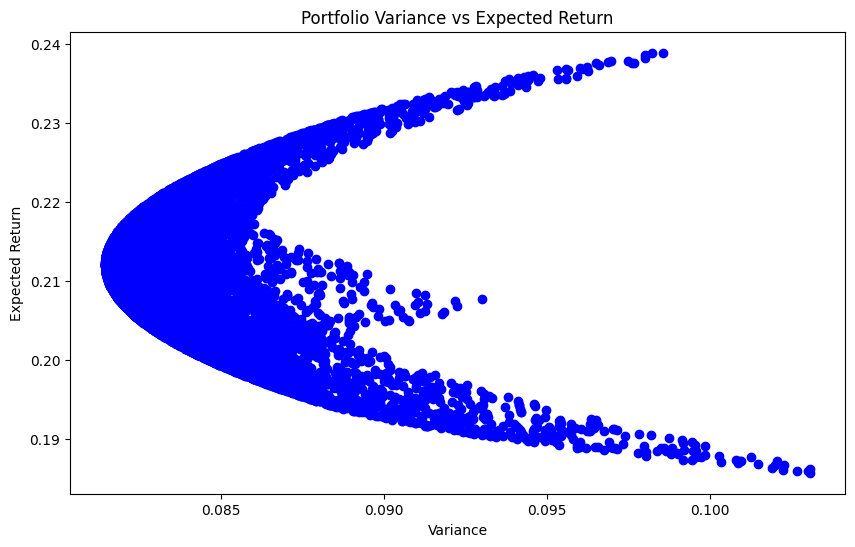

In [72]:


import matplotlib.pyplot as plt

variances = []
portfolio_returns = []
return_array = np.array(expected_returns["Annual Return"])


for i in range(10000):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    variances.append(calculate_variance(weights))
    returns = expected_returns["Annual Return"]
    portfolio_returns.append(calculate_expected_return(weights, returns))

plt.figure(figsize=(10, 6))
plt.scatter(variances, portfolio_returns, c='blue', marker='o')
plt.xlabel('Variance')
plt.ylabel('Expected Return')
plt.title('Portfolio Variance vs Expected Return')
plt.show()



https://faculty.washington.edu/ezivot/econ424/portfolioTheoryMatrix.pdf

https://scholarship.richmond.edu/cgi/viewcontent.cgi?article=1018&context=finance-faculty-publications
